In [2]:
import requests
import json
import pandas as pd
import numpy as np

from matplotlib.ticker import FuncFormatter
from pprint import pprint
from scipy.stats import linregress
from datetime import datetime
from matplotlib import pyplot as plt

In [3]:
# tip 2: print the type of the response
#type(response)

In [4]:
# tip 3: print the keys of a dictionary
#response.keys()

# Bank Asset Data/Graph

In [5]:
five_bank_asset_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A%20628%20OR%20CERT%3A%203510%20OR%20CERT%3A%203511%20OR%20CERT%3A%2033124%20OR%20CERT%3A%207213%20OR%20CERT%3A%2059017&fields=CERT%2CREPDTE%2CASSET%2CCHBAL%2CSC%2CFREPO%2CLNLSNET%2CLNRE%2CTRADE%2CBKPREM%2CORE%2CINTAN%2CAOA%2CNAME%2C%20TRADE&sort_by=REPDTE&sort_order=DESC&limit=264&format=json&download=false&filename=data_file"

In [6]:
bank_asset= requests.get(five_bank_asset_url).json()
pprint(bank_asset)

{'data': [{'data': {'AOA': 49332000,
                    'ASSET': 490799000,
                    'BKPREM': 602000,
                    'CERT': 33124,
                    'CHBAL': 122935000,
                    'FREPO': 68655000,
                    'ID': '33124_20230331',
                    'INTAN': 1890000,
                    'LNLSNET': 157130000,
                    'LNRE': 26899000,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'ORE': 0,
                    'REPDTE': '20230331',
                    'SC': 32751000,
                    'TRADE': 57504000},
           'score': 0},
          {'data': {'AOA': 112474000,
                    'ASSET': 2518290000,
                    'BKPREM': 19403000,
                    'CERT': 3510,
                    'CHBAL': 365662000,
                    'FREPO': 40359000,
                    'ID': '3510_20230331',
                    'INTAN': 58620000,
                    'LNLSNET': 1030410000,
                    'LNRE'

In [7]:
# tip 2: print the type of the response
type(bank_asset)

dict

In [8]:
# tip 3: print the keys of a dictionary
bank_asset.keys()

dict_keys(['meta', 'data', 'totals'])

In [9]:
#Create a list to hold the data of each financial asset
Combined_assetdata=[]

#loop through the data details of the dictionary 
for asset in bank_asset['data']:
        Date = asset['data']["REPDTE"]
        Total_asset=asset['data']["ASSET"]
        Bank_Certificate=asset['data']["CERT"]
        Bank_Name=asset['data']["NAME"]
        Cash_Balances_due_Depo_In=asset['data']["CHBAL"]
        Securities=asset['data']["SC"]
        Federal_Funds_Sold_Reverse_repurchase=asset['data']["FREPO"]
        Net_Loans_Leases=asset['data']["LNLSNET"]
        Real_Estate_loan=asset['data']["LNRE"]
        Bankpremises_fixedasset=asset['data']["BKPREM"]
        Other_real_estate_owned=asset['data']["ORE"]
        Goodwill_otherIntangibles=asset['data']["INTAN"]
        All_Other_Assets=asset['data']["AOA"]
        Trading_Account_Assets=asset["data"]["TRADE"]
        
        
        Combined_assetdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Asset": Total_asset,
                                  "Cash and Balances due from Depository Institutions": Cash_Balances_due_Depo_In,
                                  "Securities": Securities,
                                   "Federal Funds Sold & Reverse Repurchase Agreements":Federal_Funds_Sold_Reverse_repurchase,
                                  "Net Loans Lease":Net_Loans_Leases,
                                   "Trading Account Assets":Trading_Account_Assets,
                                  "All Real Estate Loans":Real_Estate_loan,
                                   "Bank Premises and Fixed Assets":Bankpremises_fixedasset,
                                  "Other Real Estate Owned":Other_real_estate_owned,
                                   "Goodwill and Other Intangibles":Goodwill_otherIntangibles,
                                  "All Other Asset":All_Other_Assets
                                  })
     

In [10]:
new_data = pd.DataFrame(Combined_assetdata)

new_bank_asset= new_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_asset.head()

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,Trading Account Assets,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset
0,20120630,CITIBANK NATIONAL ASSN,7213,1347841000,172522000,254308000,71198000,573969000,170927000,195686000,4553000,348000,18532000,81484000
1,20120630,GOLDMAN SACHS BANK USA,33124,114693000,44086000,0,11128000,13810000,38177000,2586000,0,0,4000,7488000
2,20120630,BANK OF AMERICA NA,3510,1445093157,136863710,328771279,16586665,702943873,77954029,412263790,10253110,2501993,63950326,105268172
3,20120630,JPMORGAN CHASE BANK NA,628,1812825000,176095000,342767000,247782000,594303000,287301000,275976000,10424000,2050000,35762000,116341000
4,20120630,FIRST REPUBLIC BANK,59017,30987001,800818,3105339,19330,25034919,17434,22526845,126297,3490,168475,1710899


##Part 1: a) Create stack stacked bar chart, b) liquidity ration, 3)Pie chart analysis of current asset vs. non-current
 

In [11]:
#Total assets=  Cash and balances due from depository institutions + securities+ Net Loans and leases + Other Real Estates Owned+ Goodwill and other Intangibles
#Current asset = Cash and balances due from depository institutions + securities
#create dataframe of each bank of the current asset vs. total asset
new_bank_asset["Current Asset"]=new_bank_asset["Cash and Balances due from Depository Institutions"]+new_bank_asset["Securities"]+new_bank_asset["Federal Funds Sold & Reverse Repurchase Agreements"]
new_bank_asset["Curret Asset Ratio"]=new_bank_asset["Current Asset"]/new_bank_asset["Total Asset"]
new_bank_asset.tail(12)


,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,Trading Account Assets,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset,Current Asset,Curret Asset Ratio
252,20221231,CITIBANK NATIONAL ASSN,7213,1766752000,330199000,485347000,92279000,625986000,119532000,167633000,12071000,11000,13854000,87473000,907825000,0.513838
253,20221231,JPMORGAN CHASE BANK NA,628,3201942000,568546000,631123000,313102000,1124240000,287485000,383040000,23378000,211000,48600000,205257000,1512771000,0.472454
254,20221231,FIRST REPUBLIC BANK,59017,212638872,4283201,31718821,0,166083667,95253,138507527,1718019,0,229623,8510288,36002022,0.169311
255,20221231,WELLS FARGO BANK NA,3511,1717531000,156379000,401571000,73884000,906316000,63402000,403691000,10516000,207000,33036000,72220000,631834000,0.367873
256,20221231,BANK OF AMERICA NA,3510,2418508000,213093000,824974000,31316000,1029699000,137739000,325508000,19397000,296000,58665000,103329000,1069383000,0.442166
257,20221231,GOLDMAN SACHS BANK USA,33124,486967000,184470000,29588000,36309000,158254000,40243000,26310000,644000,0,1855000,35604000,250367000,0.514135
258,20230331,CITIBANK NATIONAL ASSN,7213,1721547000,320187000,470731000,74700000,614300000,127895000,170027000,12097000,16000,13881000,87740000,865618000,0.502814
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,551018000,610041000,364136000,1118613000,355166000,382261000,23451000,206000,48371000,196961000,1525195000,0.466711
260,20230331,FIRST REPUBLIC BANK,59017,232944161,13159283,34313041,0,172508687,52805,142800644,1734733,0,203723,10971889,47472324,0.203793
261,20230331,WELLS FARGO BANK NA,3511,1687507000,160472000,412394000,42255000,898858000,57806000,400457000,10555000,214000,32480000,72473000,615121000,0.364515


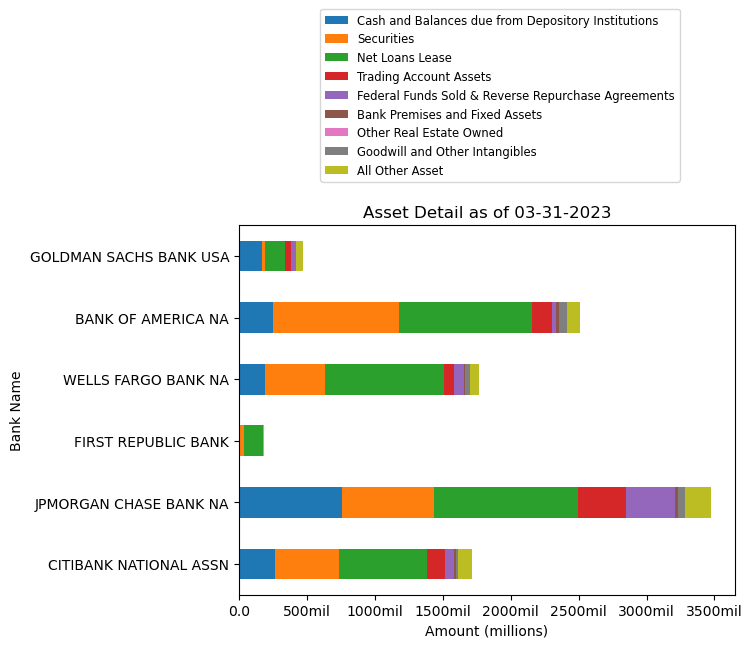

In [16]:
#create a stack bar chart with the compositon of the asset.
#Total Asset= Cash and Balances due from Depository Institutions+Securities+Net Loans Lease+Federal funds sold & revenue repurchase agreements +Trading account assets + Banking premises and fixed assets+ Other real estate owned+ Goodwill and other intangibles+All other assets
March312023_bank_asset=new_bank_asset.loc[(new_bank_asset["Reporting Date"]=="20220331")]
Asset_df=March312023_bank_asset.set_index("Bank Name")[["Cash and Balances due from Depository Institutions","Securities","Net Loans Lease","Trading Account Assets","Federal Funds Sold & Reverse Repurchase Agreements","Bank Premises and Fixed Assets","Other Real Estate Owned","Goodwill and Other Intangibles","All Other Asset"]]
#ax = Asset_df.plot.bar(stacked=True)
ax = Asset_df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor= (0.9, 1.6),fontsize='small')
plt.title("Asset Detail as of 03-31-2023")
plt.xlabel("Amount (millions)")
plt.ylabel("Bank Name")

def format_x_axis_labels(value, _):
    if value >= 1000000:
        value = f"{int(value/1000000)}mil"
    return value

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_axis_labels))

plt.savefig("Outputs/Asset_Details_03312023.png")

# Bank Asset Bar Chart Findings/Conclusions:
1) The stacked asset bar chart show, JP Morgan has over 3.2 billion in asset and is the largest bank in the US in size and operations compared to the other 4 largest banks: BOA - 2.5 billion,Citi -1.7 billion, Wells Fargo- 1.68 billion, Goldman - 500 million. First Replblic Bank is the smallest with about 230 million in assets.

2) The assets of the banks consists of cash and deposit loaned out to other banks, securities that banks invested in, loans and leases to individuals and business to earn interest - which is the main operation of the bank, Federal funds sold are excess of bank reserves lent in the federal funds market, Reverse Repurchase Agreements is the sale of securities with the agreement to repurchase them at a higher price at a specific future date. Based on the bar chart, JP Morgan has more additional excess funds/capital reserve avaliable compared to the other banks and has a greater amount of excess funds lent out to  other banks and to the federal funds market. Additionally JPMC aslo lent to other banks via reverse repurchase agreement (where jpmc buys the securities from another bank and agrees to sell them back at a premium the next day as the other banks are short in cash reserve). Based on our research, JPMC is more liquid and has the ability to convert assets into cash quickly to cover unexpected cash outflows. This could be one of the reason that FDIC chair called the CEO of JP Morgan to bail out First Republic Bank when it failed in May 2023.

3) The above bar chart for First Republic Banks show it only had the 3 following assets: 1)Cash and Balances due from Depository Institutions, Securities, loan and leases to to individuals and business and other assets. However, cash loaned to other banks is only $1 million, it did not have excess reserves or fund. 

# Bank Liabilities & Capital

In [18]:
bank_liabilites_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A%20628%20OR%20CERT%3A%203510%20OR%20CERT%3A%203511%20OR%20CERT%3A%2033124%20OR%20CERT%3A%207213%20OR%20CERT%3A%2059017&fields=CERT%2CREPDTE%2CDEP%2CDEPDOM%2CDEPFOR%2CFREPP%2CTRADEL%2COTHBRF%2CALLOTHL%2CEQTOT%2CNAME%2CSUBND%2CLIABEQ%2CLIAB&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [19]:
Bank_liabilites= requests.get(bank_liabilites_url).json()
pprint(Bank_liabilites)

{'data': [{'data': {'ALLOTHL': 35566000,
                    'CERT': 33124,
                    'DEP': 337173000,
                    'DEPDOM': 324813000,
                    'DEPFOR': 12360000,
                    'EQTOT': 50422000,
                    'FREPP': 24000000,
                    'ID': '33124_20230331',
                    'LIAB': 440377000,
                    'LIABEQ': 490799000,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'OTHBRF': 9660000,
                    'REPDTE': '20230331',
                    'SUBND': 2272000,
                    'TRADEL': 31706000},
           'score': 0},
          {'data': {'ALLOTHL': 41508000,
                    'CERT': 3510,
                    'DEP': 2015381000,
                    'DEPDOM': 1903082000,
                    'DEPFOR': 112299000,
                    'EQTOT': 232471000,
                    'FREPP': 141110000,
                    'ID': '3510_20230331',
                    'LIAB': 2285819000,
     

In [20]:
#Create a list to hold the data of each financial asset
Combined_liabilitesdata=[]

for liab in Bank_liabilites['data']:
        Date = liab['data']["REPDTE"]
        Bank_Certificate=liab['data']["CERT"]
        Bank_Name=liab['data']["NAME"]
        Total_liabilites_and_capitals=liab['data']["LIABEQ"]
        Total_liabilities=liab['data']["LIAB"]
        Total_Deposit=liab['data']["DEP"]
        Deposits_in_Domestic_Offices=liab['data']["DEPDOM"]
        Deposits_in_Foreign_Offices=liab['data']["DEPFOR"]
        All_other_liabilities=liab['data']["ALLOTHL"]
        Total_Equity_Capital=liab['data']["EQTOT"]
        Federal_funds_purchased_repurchase=liab['data']["FREPP"]
        Trading_Liabilities=liab['data']["TRADEL"]
        Other_borrowed_funds=liab['data']["OTHBRF"]
        Subordinated_debt=liab['data']["SUBND"]
        
        
        
        
        
        Combined_liabilitesdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Liabilites and capitals": Total_liabilites_and_capitals,
                                   "Total Liabilites":Total_liabilities,
                                   "Total Deposit": Total_Deposit,
                                   "Total Domestic Deposit":Deposits_in_Domestic_Offices,
                                   "Total Foreign Deposit":Deposits_in_Foreign_Offices,
                                   "All other Liabilities":All_other_liabilities,
                                   "Total Equity Capital":Total_Equity_Capital,
                                   "Federal funds purchased and repurchase agreements":Federal_funds_purchased_repurchase,
                                   "Trading Liabilites": Trading_Liabilities,
                                   "Other borrowed funds": Other_borrowed_funds,
                                    "Subordinated debt":Subordinated_debt
                                  })
     

In [21]:
new_liabilites_data= pd.DataFrame(Combined_liabilitesdata)

new_bank_liabilites= new_liabilites_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_liabilites.tail(12)

,Reporting Date,Bank Name,Bank Certificate #,Total Liabilites and capitals,Total Liabilites,Total Deposit,Total Domestic Deposit,Total Foreign Deposit,All other Liabilities,Total Equity Capital,Federal funds purchased and repurchase agreements,Trading Liabilites,Other borrowed funds,Subordinated debt
252,20221231,CITIBANK NATIONAL ASSN,7213,1766752000,1601807000,1399631000,777024000,622607000.0,59273000,164945000,16188000,59807000,56408000,10500000
253,20221231,JPMORGAN CHASE BANK NA,628,3201942000,2898270000,2440722000,2014513000,426209000.0,157039000,303672000,85902000,115971000,98375000,261000
254,20221231,FIRST REPUBLIC BANK,59017,212638872,195192945,176436706,176436706,0.0,3401373,17445927,0,75775,14499860,779231
255,20221231,WELLS FARGO BANK NA,3511,1717531000,1556061000,1420842000,1399274000,21568000.0,29253000,161470000,13461000,22398000,59201000,10906000
256,20221231,BANK OF AMERICA NA,3510,2418508000,2193059000,2042255000,1929333000,112922000.0,42417000,225449000,47475000,34692000,24735000,1485000
257,20221231,GOLDMAN SACHS BANK USA,33124,486967000,438626000,362009000,352005000,10004000.0,28682000,48341000,8406000,29090000,6168000,4271000
258,20230331,CITIBANK NATIONAL ASSN,7213,1721547000,1553334000,1355315000,755796000,599519000.0,57528000,168213000,16308000,56752000,56931000,10500000
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,2958911000,2472913000,2043646000,429267000.0,147462000,309052000,110991000,126220000,101065000,260000
260,20230331,FIRST REPUBLIC BANK,59017,232944161,214954325,104473959,104473959,0.0,3760542,17989836,445753,50578,105444141,779352
261,20230331,WELLS FARGO BANK NA,3511,1687507000,1524982000,1406796000,1387849000,18947000.0,28607000,162525000,8289000,20579000,49675000,11036000


In [22]:
#calculate current liability of the bank - will use to determine the current ratio
new_bank_liabilites["Current Liability"]=new_bank_liabilites["Total Deposit"]+new_bank_liabilites["Federal funds purchased and repurchase agreements"]
new_bank_liabilites.tail()

,Reporting Date,Bank Name,Bank Certificate #,Total Liabilites and capitals,Total Liabilites,Total Deposit,Total Domestic Deposit,Total Foreign Deposit,All other Liabilities,Total Equity Capital,Federal funds purchased and repurchase agreements,Trading Liabilites,Other borrowed funds,Subordinated debt,Current Liability
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,2958911000,2472913000,2043646000,429267000.0,147462000,309052000,110991000,126220000,101065000,260000,2583904000
260,20230331,FIRST REPUBLIC BANK,59017,232944161,214954325,104473959,104473959,0.0,3760542,17989836,445753,50578,105444141,779352,104919712
261,20230331,WELLS FARGO BANK NA,3511,1687507000,1524982000,1406796000,1387849000,18947000.0,28607000,162525000,8289000,20579000,49675000,11036000,1415085000
262,20230331,BANK OF AMERICA NA,3510,2518290000,2285819000,2015381000,1903082000,112299000.0,41508000,232471000,141110000,29893000,56413000,1514000,2156491000
263,20230331,GOLDMAN SACHS BANK USA,33124,490799000,440377000,337173000,324813000,12360000.0,35566000,50422000,24000000,31706000,9660000,2272000,361173000


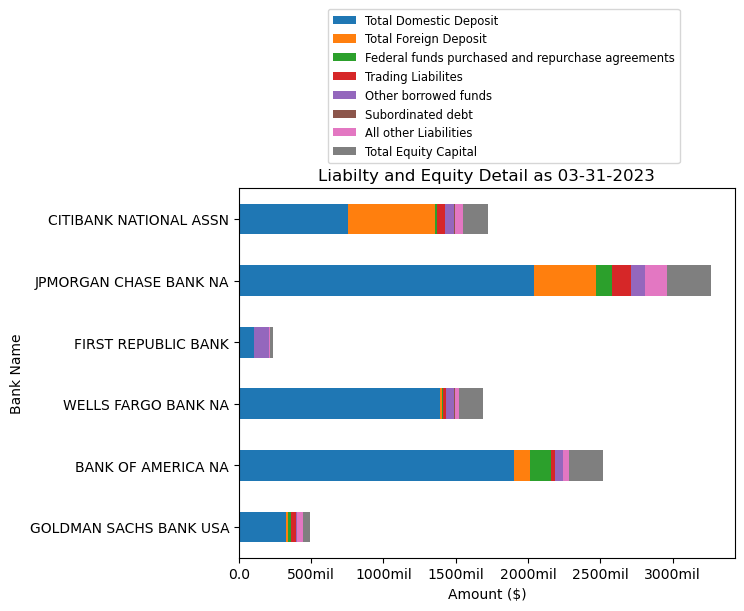

In [23]:
#Total Liabilites and capitals=Total Domestic Deposit+Total Foreign Deposit+Federal funds purchased and repurchase agreements+Trading Liabilities+Other borrowed funds+Subordinated debt+All other liabilities+Total Equity Capital
March312023_bank_liability=new_liabilites_data.loc[(new_liabilites_data["Reporting Date"]=="20230331")]
liability_df=March312023_bank_liability.set_index("Bank Name")[["Reporting Date","Total Domestic Deposit","Total Foreign Deposit","Federal funds purchased and repurchase agreements","Trading Liabilites","Other borrowed funds","Subordinated debt","All other Liabilities","Total Equity Capital"]]
#ax = Asset_df.plot.bar(stacked=True)
ax = liability_df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor= (0.9, 1.5),fontsize='small')
plt.title("Liabilty and Equity Detail as 03-31-2023")
plt.xlabel("Amount ($)")
plt.ylabel("Bank Name")

def format_x_axis_labels(value, _):
    if value >= 1000000:
        value = f"{int(value/1000000)}mil"
    return value

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_axis_labels))

plt.savefig("Outputs/Liability_Equity_03312023.png")

# Bank Liability and Equity = Asset
Bank liability is what the bank owes to others - the deposit from customers are liability as the bank will need to return to customer.
Equity= total asset- total liabilities. Net worth/capital of the bank or its equity value to investors.

Based on the bar chart, all bank's largest liability is deposit received from customers - which is the main source of their funds. In addition, the main depoists are from the US. JPMC also has the largest equity/capital - which means greater valuation by investors.

In addition, for the quarter ending March 31, 2023 (bank failed on May 1, 2023), first repubic has borrowed funds representing 50% of its liability to support its business operations. The banks has very small capital as shown Total Equity/Capital - which mean investors were already weary of the outlook of the bank and confidence in the bank is low. 



In [25]:
#Current Ratio = Current Asset/Current Liability -used to short term solvency of the banks
current_ratio_df=new_bank_liabilites[["Reporting Date","Bank Name"]]
current_ratio_df["Current Ratio"]=new_bank_asset["Current Asset"]/new_bank_liabilites["Current Liability"]
current_ratio_df


/var/folders/xd/nv_kzvwn19x7xd13bmlf5vj00000gn/T/ipykernel_15119/207294053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_ratio_df["Current Ratio"]=new_bank_asset["Current Asset"]/new_bank_liabilites["Current Liability"]


,Reporting Date,Bank Name,Current Ratio
0,20120630,CITIBANK NATIONAL ASSN,0.512250
1,20120630,GOLDMAN SACHS BANK USA,0.782966
2,20120630,BANK OF AMERICA NA,0.422077
3,20120630,JPMORGAN CHASE BANK NA,0.567264
4,20120630,FIRST REPUBLIC BANK,0.162108
...,...,...,...
259,20230331,JPMORGAN CHASE BANK NA,0.590268
260,20230331,FIRST REPUBLIC BANK,0.452463
261,20230331,WELLS FARGO BANK NA,0.434688
262,20230331,BANK OF AMERICA NA,0.542453


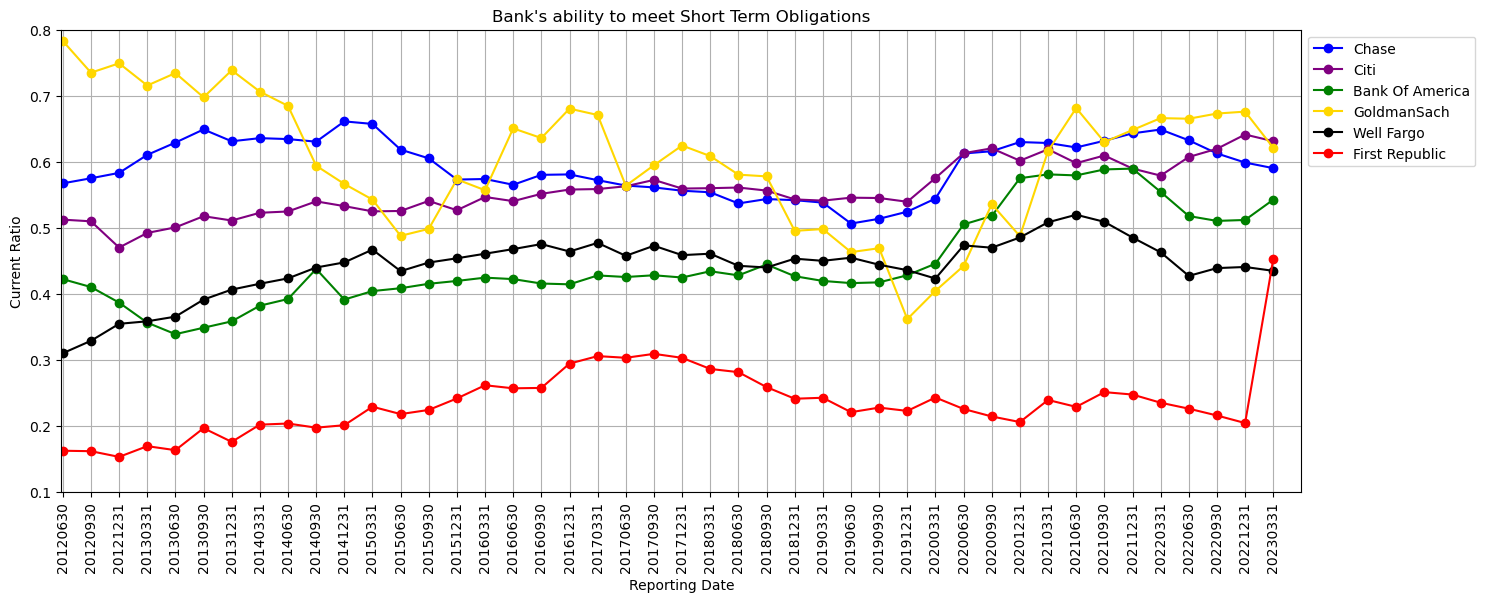

In [43]:
#Plot current ratio over time for the six banks

#Set figure size
plt.figure(figsize=(16,6))

#Prepare x-axis
x_axis = np.arange(len(current_ratio_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#plot each bank's data
Chase,=plt.plot(x_axis,current_ratio_df.loc[(current_ratio_df["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Current Ratio"], color="blue", label="Chase",marker='o')
Citi,=plt.plot(x_axis,current_ratio_df.loc[(current_ratio_df["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Current Ratio"], color="purple", label="Citi",marker='o')
BOA, = plt.plot(x_axis,current_ratio_df.loc[(current_ratio_df["Bank Name"]=="BANK OF AMERICA NA"),"Current Ratio"], color="green", label="Bank Of America",marker='o')
GoldmanSachs,=plt.plot(x_axis,current_ratio_df.loc[(current_ratio_df["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Current Ratio"], color="gold", label="GoldmanSach",marker='o')
Wells_Fargo,=plt.plot(x_axis, current_ratio_df.loc[(current_ratio_df["Bank Name"]=="WELLS FARGO BANK NA"),"Current Ratio"], color="black", label="Well Fargo",marker='o')
First_republic,=plt.plot(x_axis,current_ratio_df.loc[(current_ratio_df["Bank Name"]=="FIRST REPUBLIC BANK"),"Current Ratio"], color="red", label="First Republic",marker='o')

plt.xticks(tick_locations, current_ratio_df["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Bank's ability to meet Short Term Obligations")
plt.xlabel("Reporting Date")
plt.ylabel("Current Ratio")

# Add limits to x axis and y-axis
plt.xlim(-0.05,len(current_ratio_df["Reporting Date"].unique()))
plt.ylim(0.1,0.8)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))

plt.grid()

plt.savefig("Outputs/Bank_ability_to_meet_short_term_obligations.png",bbox_inches = "tight")

# Current Ratio Analysis:
Current Ratio can be defined as a liquidity ratio that measures a company's ability to pay short-term obligations or those due within one year. 

Current Ratio=Current Asset/Current Liability 

Current asset are the most liquid forms of assets that can be turned to cash. The current asset = Cash and balances due from depository institutions + securities+Federal Funds Sold & Reverse Repurchase Agreements. We want to analyze the bank's ability to cover short term liabilities with its assets.

Current Liability is the short term obligations that the bank must pay back on demand such as depoist froms customers.

Current liability= Total Deposit + Federal funds purchased and repurchase agreements

Based on line graph comparison, first republic bank's current ratio was always lower than other 5 banks. The current ratio for JPMC is the similar compared to citibank and higher than BOA and Wells Fargo.

First republic's current asset ratio has been declining since 2017 and have not been more than 2.5 while the other 5 banks which have been at least 0.4 (with the exception of Goldman Sach for 12/31/2019). The ratio could also explain majority of First Republic's asset is invested in long term vehicles and will not be able to handle the unexpected cash outflows or market fluctions such as conistent increase in interest rate on the liabilities the bank owes. There was a sharp increase in the ratio from 0.2 to 0.45 from the quarter ending 12/31/2023 to 03/31/2023, the reason is due to 70 mil decrease in deposit - due to the signficant decrease in liability due from deposit.  



# Bank Performace 

In [27]:
bank_performance_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CROE%2CROA%2CNIMY%2CEEFFR%2CLNLSNTV%2CLNLSDEPR%2CIDLNCORR%2CDEPDASTR%2CIDT1RWAJR%2CRBC1AAJ%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [28]:
bank_performace=requests.get(bank_performance_url).json()
pprint(bank_performace)

{'data': [{'data': {'CERT': 33124,
                    'DEPDASTR': 66.18,
                    'EEFFR': 42.61487964989059,
                    'ID': '33124_20230331',
                    'IDLNCORR': 64.20702505679868,
                    'IDT1RWAJR': 13.598852660054359,
                    'LNLSDEPR': 46.60218938052572,
                    'LNLSNTV': 32.02,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'NIMY': 2.1266688279154753,
                    'RBC1AAJ': 9.776439756905367,
                    'REPDTE': '20230331',
                    'ROA': 1.3532890282542038,
                    'ROE': 13.41},
           'score': 0},
          {'data': {'CERT': 3510,
                    'DEPDASTR': 75.57,
                    'EEFFR': 52.53852097631926,
                    'ID': '3510_20230331',
                    'IDLNCORR': 55.169138563463974,
                    'IDT1RWAJR': 13.347971635290307,
                    'LNLSDEPR': 51.127305457380025,
                    

In [29]:
combined_performance=[]

for perf in bank_performace['data']:
        Date = perf['data']["REPDTE"]
        Bank_Certificate=perf['data']["CERT"]
        Bank_Name=perf['data']["NAME"]
        Net_Interest_Margin=perf['data']["NIMY"]
        Return_on_Assets=perf['data']["ROA"]
        Return_on_Equity=perf['data']["ROE"]
        Efficiency_Ratio=perf['data']["EEFFR"]
        Net_Loans_Leases_to_Assets=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_Deposits=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_CoreDeposit=perf['data']["IDLNCORR"]
        Domestic_Deposits_to_Total_Assets=perf['data']["DEPDASTR"]
        Tier_1_Risk_Based_Capital_Ratio=perf['data']["IDT1RWAJR"]
        
        
        combined_performance.append({"Reporting Date": Date,
                                     "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                    "Net Interest Margin": Net_Interest_Margin,
                                    "Return on Assets": Return_on_Assets,
                                    "Return on Equity": Return_on_Assets,
                                    "Efficiency Ratio": Efficiency_Ratio,
                                    "Net Loans Leases to Assets": Net_Loans_Leases_to_Assets,
                                    "Net Loans Leases to Deposits": Net_Loans_Leases_to_Deposits,
                                    "Net Loans Leases to Core Deposit": Net_Loans_Leases_to_CoreDeposit,
                                    "Domestic Deposits to Total Assets":Domestic_Deposits_to_Total_Assets,
                                    "Tier 1 Risk Based Capital Ratio": Tier_1_Risk_Based_Capital_Ratio
                                       })
     

In [30]:
new_perf_data= pd.DataFrame(combined_performance)

new_bank_perfor= new_perf_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_perfor.tail()

,Reporting Date,Bank Name,Bank Certificate #,Net Interest Margin,Return on Assets,Return on Equity,Efficiency Ratio,Net Loans Leases to Assets,Net Loans Leases to Deposits,Net Loans Leases to Core Deposit,Domestic Deposits to Total Assets,Tier 1 Risk Based Capital Ratio
259,20230331,JPMORGAN CHASE BANK NA,628,3.037683,1.448429,1.448429,49.889716,34.23,34.23,59.124465,62.54,17.263379
260,20230331,FIRST REPUBLIC BANK,59017,1.697503,0.483146,0.483146,68.120847,74.06,74.06,294.056164,44.85,11.673376
261,20230331,WELLS FARGO BANK NA,3511,3.596714,1.413670,1.413670,56.405511,53.27,53.27,68.612129,82.24,12.240646
262,20230331,BANK OF AMERICA NA,3510,2.806533,1.343057,1.343057,52.538521,40.92,40.92,55.169139,75.57,13.347972
263,20230331,GOLDMAN SACHS BANK USA,33124,2.126669,1.353289,1.353289,42.614880,32.02,32.02,64.207025,66.18,13.598853


# Net Loans Leases to Assets Over Time vs Reporting Date

# Net Interest Margin

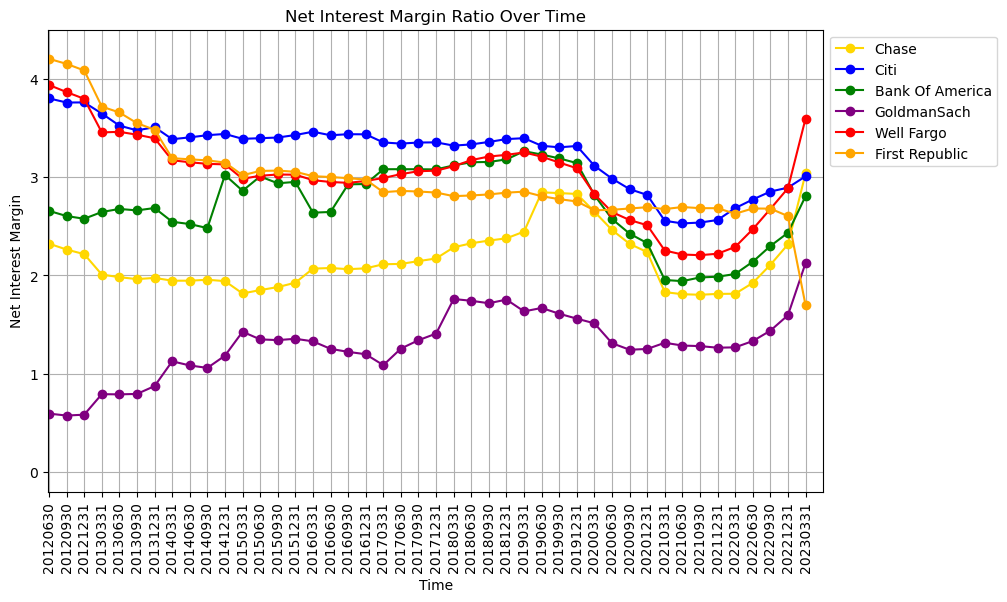

In [44]:
plt.figure(figsize=(10,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Net Interest Margin"], marker ='o' ,color="gold", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Net Interest Margin"], marker ='o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Net Interest Margin"], marker = 'o', color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Net Interest Margin"], marker = 'o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Net Interest Margin"], marker = 'o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Net Interest Margin"], marker ='o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes :: Add title
plt.title("Net Interest Margin Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Net Interest Margin")

# Add limits to x axis and y-axis
plt.xlim(-0.05,44)
plt.ylim(-0.2,4.5)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

plt.savefig("Outputs/Net_Interest_Margin.png",bbox_inches = "tight")

# Return on Assets

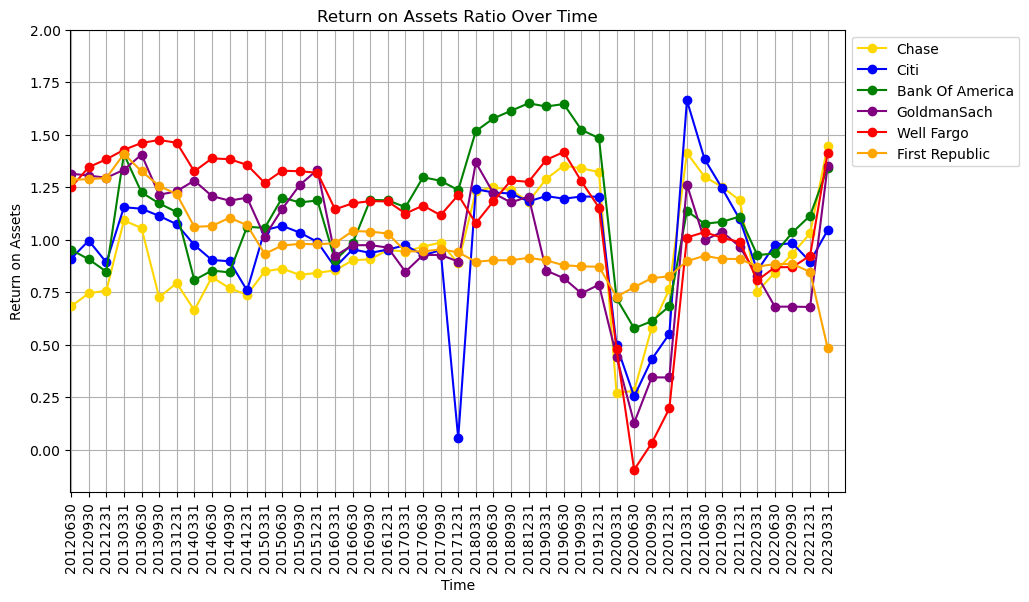

In [45]:
plt.figure(figsize=(10,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Return on Assets"], marker ='o', color="gold", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Return on Assets"], marker ='o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Return on Assets"], marker ='o', color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Return on Assets"], marker ='o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Return on Assets"], marker='o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Return on Assets"], marker ='o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes :: Add title
plt.title("Return on Assets Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Return on Assets")

# Add limits to x axis and y-axis
plt.xlim(-0.05,44)
plt.ylim(-0.2,2)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

plt.savefig("Outputs/Return_on_Asset.png",bbox_inches = "tight")

# Return on equity

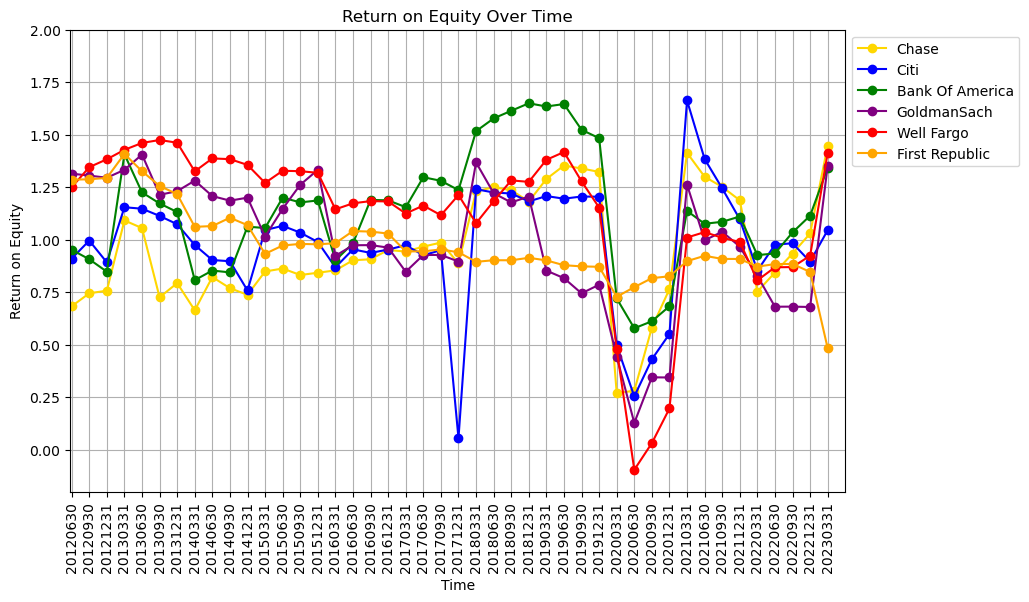

In [46]:
plt.figure(figsize=(10,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Return on Equity"], marker ='o', color="gold", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Return on Equity"], marker = 'o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Return on Equity"], marker ='o',color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Return on Equity"], marker ='o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Return on Equity"], marker ='o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Return on Equity"], marker ='o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes :: Add title
plt.title("Return on Equity Over Time")
plt.xlabel("Time")
plt.ylabel("Return on Equity")

# Add limits to x axis and y-axis
plt.xlim(-0.08,44)
plt.ylim(-0.2,2)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

plt.savefig("Outputs/Return_on_Equity.png",bbox_inches = "tight")

# Efficiency Ratio

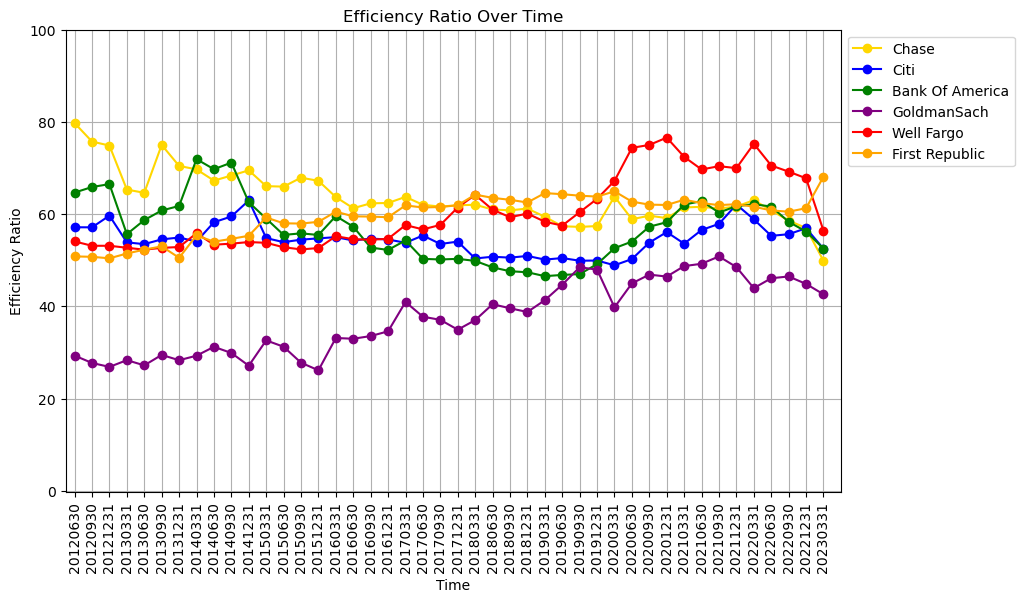

In [47]:
plt.figure(figsize=(10,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Efficiency Ratio"], marker ='o', color="gold", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Efficiency Ratio"], marker = 'o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Efficiency Ratio"], marker ='o', color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Efficiency Ratio"],marker ='o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Efficiency Ratio"], marker ='o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Efficiency Ratio"], marker = 'o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes :: Add title
plt.title("Efficiency Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Efficiency Ratio")

# Add limits to x axis and y-axis
plt.xlim(-0.5,44)
plt.ylim(-0.2,100)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

plt.savefig("Outputs/Efficiency_Ratio.png",bbox_inches = "tight")

In [41]:
# Define a function to format y-axis labels
def format_y_axis_labels(value, _):
    if value >= 1000:
        value = f"{int(value/1000)}K"
    return value

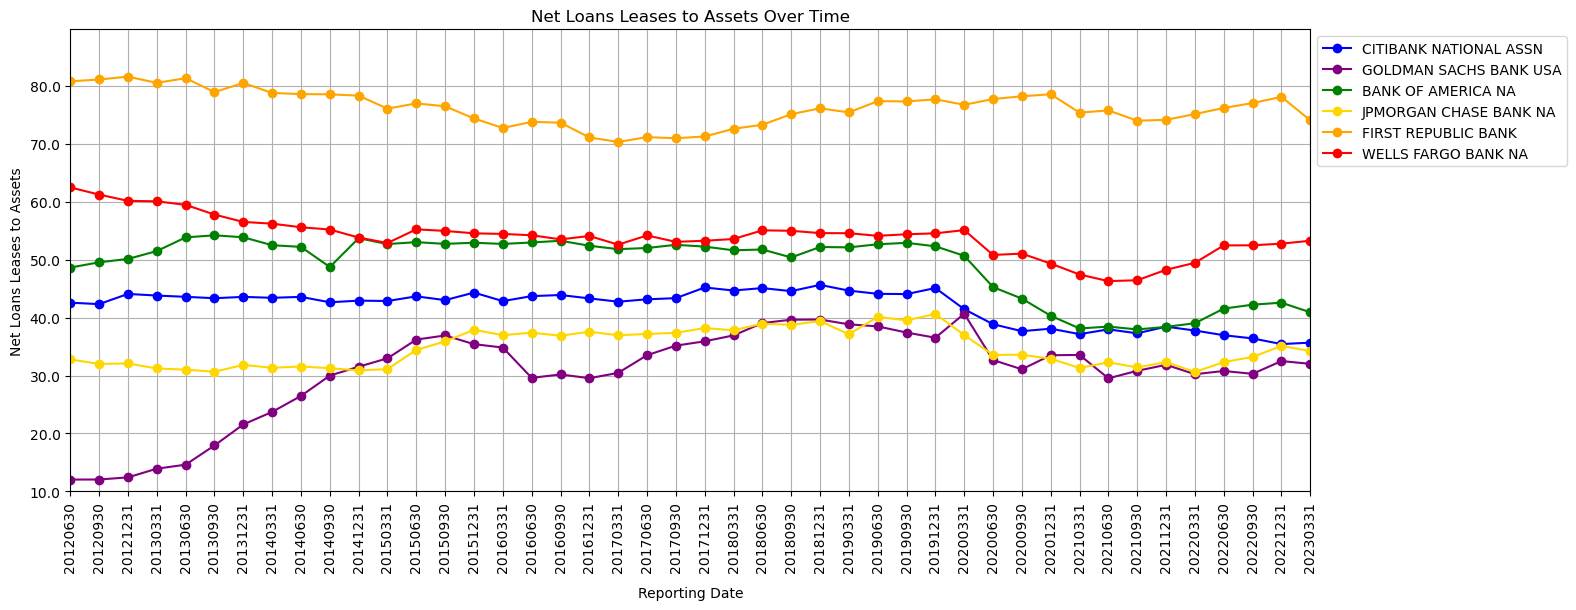

In [51]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Net Loans Leases to Assets"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Leases to Assets Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Leases to Assets")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = new_bank_perfor["Net Loans Leases to Assets"].max()
plt.ylim(10, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
#plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

plt.savefig("Outputs/Net_Loans_Leases_to_Assets.png",bbox_inches = "tight")

# Show the plot
plt.show()



# Net Loans Leases to Assets Analysis
1. Over the period from 2012 to 2023, an analysis of the Net Loans Leases to Assets ratio reveals notable variations in performance among different banks. First Republic Bank exhibited comparatively weaker performance, with a higher level of risk associated with its loan portfolio. This indicates potential challenges in managing and maintaining a balanced asset-to-loan ratio.
2. Conversely, Goldman Sachs demonstrated a relatively lower level of risk in terms of its Net Loans Leases to Assets ratio. Although minor fluctuations were observed over the years, the bank showcased a consistent and prudent approach to managing its loan portfolio, emphasizing risk mitigation strategies.
3. JP Morgan Chase, positioned as the second-best performer in terms of Net Loans Leases to Assets ratio, showcased a higher level of stability and consistency compared to other banks. While not as low-risk as Goldman Sachs, JP Morgan Chase's performance indicates effective loan portfolio management and a balanced approach to asset allocation.

-These observations highlight the varying levels of risk and performance among banks, with First Republic Bank exhibiting higher risk, Goldman Sachs demonstrating lower risk, and JP Morgan Chase showing a stable and consistent performance. These insights can inform assessments of each bank's loan portfolio management and risk management strategies.

# Net Loans Leases to Deposits Over Time vs Reporting Date

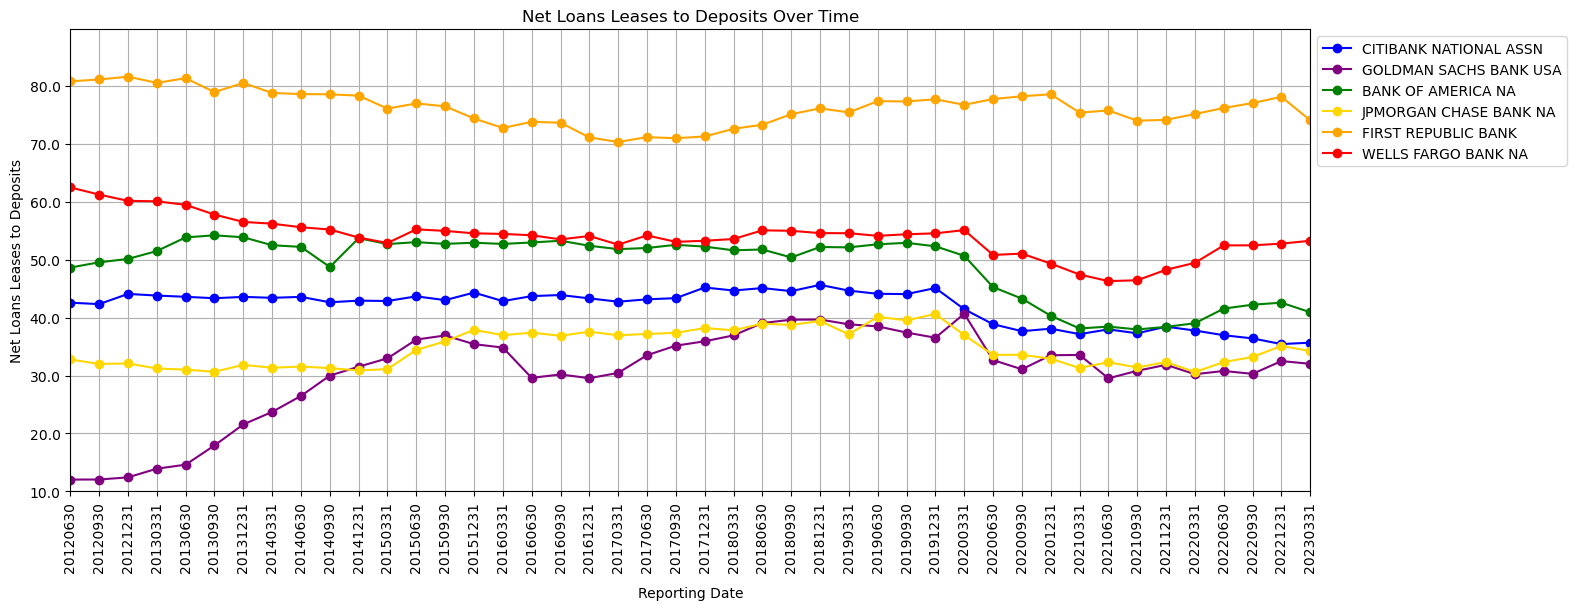

In [54]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Net Loans Leases to Deposits"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Leases to Deposits Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Leases to Deposits")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = new_bank_perfor["Net Loans Leases to Deposits"].max()
plt.ylim(10, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

plt.savefig("Outputs/Net_Loans_Leases_to_Deposit.png",bbox_inches = "tight")

# Show the plot
plt.show()



# Net Loans Leases to Deposits Analysis

1. The analysis of the Net Loans Leases to Deposits ratio for the period from 2012 to 2023 reveals significant variations in risk levels among different banks. First Republic Bank emerges as the bank with the highest risk, with the risk reaching its peak in the last quarter of the 2022-2023 financial year. This indicates potential challenges in maintaining a balanced ratio between loans and deposits.

2. In contrast, JP Morgan Chase demonstrates the second-lowest level of risk among the banks analyzed, positioned just below Goldman Sachs. This suggests that JP Morgan Chase has effectively managed its loan portfolio in relation to its deposit base, mitigating potential risks associated with lending activities.

3. Goldman Sachs exhibits several fluctuations in risk levels over the years, but overall maintains a relatively low-risk profile in terms of the Net Loans Leases to Deposits ratio. Chase, on the other hand, demonstrates a higher level of stability and consistency with a low-risk profile. This indicates effective risk management practices and a balanced approach to lending and deposit activities.
- These observations provide insights into the varying risk levels and risk management strategies employed by different banks. First Republic Bank emerges as a bank with higher risk, while JP Morgan Chase and Goldman Sachs showcase relatively lower risk profiles. Chase's consistency and stability further reinforce its prudent approach to managing the ratio between loans and deposits. These findings can assist in evaluating the risk exposure and loan portfolio management strategies of each bank.


# Domestic Deposits to Total Assets Over Time vs Reporting Date

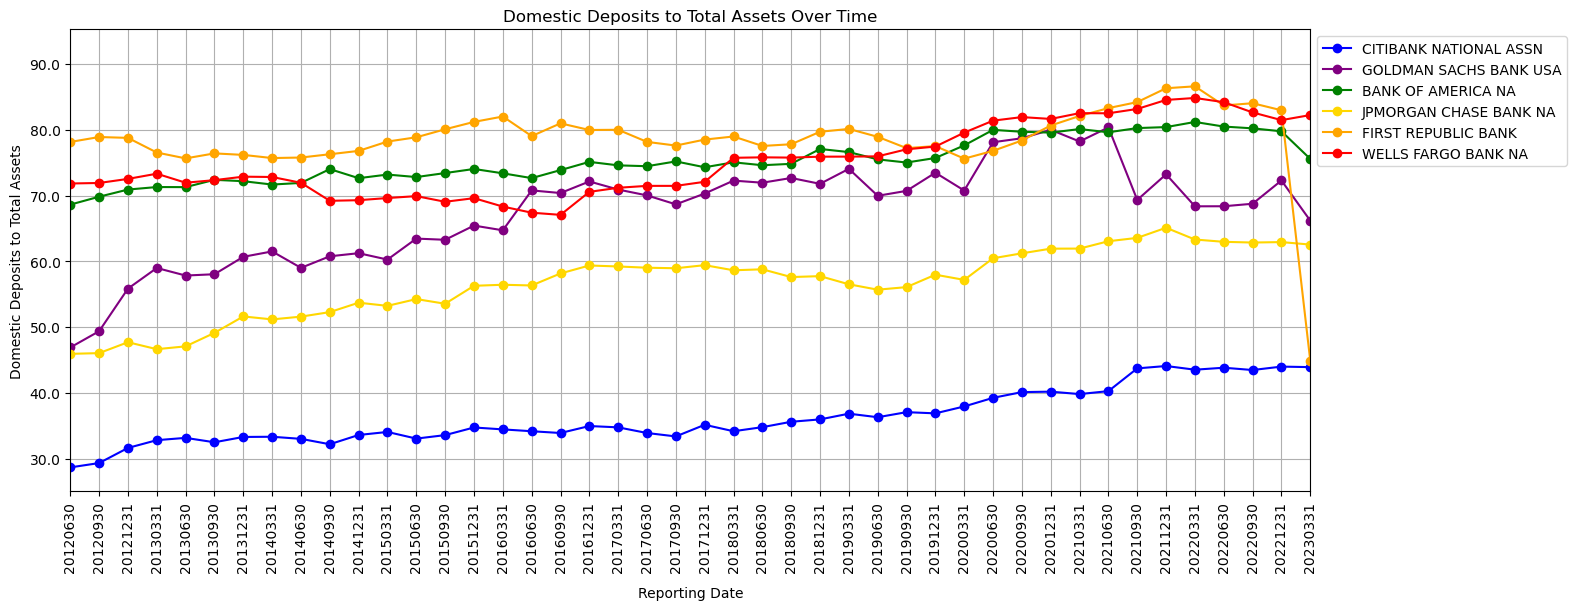

In [55]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Domestic Deposits to Total Assets"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Domestic Deposits to Total Assets Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Domestic Deposits to Total Assets")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = new_bank_perfor["Domestic Deposits to Total Assets"].max()
plt.ylim(25, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

plt.savefig("Outputs/Domestic_Deposits_to_total_asset.png",bbox_inches = "tight")

# Show the plot
plt.show()


# Domestic Deposits to Total Assets Analysis

1. The analysis of Domestic Deposits to Total Assets reveals that Citibank consistently maintained the lowest ratio compared to other banks during the period from 2012 to 2023. This suggests that Citibank had a relatively lower proportion of domestic deposits in relation to their total assets.

2.First Republic Bank and Bank of America exhibited similar trends, with both banks showcasing the highest levels of Domestic Deposits to Total Assets. This indicates that these banks had a larger share of domestic deposits as a percentage of their total assets.

3. JP Morgan Chase, on the other hand, displayed a relatively stable and consistent range of values for Domestic Deposits to Total Assets, primarily fluctuating between 45% to 65%. This suggests that JP Morgan Chase maintained a moderate level of domestic deposits in relation to their total assets, with a relatively steady pattern over time.

-These observations provide insights into the composition of domestic deposits in relation to the total assets of different banks. Citibank consistently had the lowest ratio, while First Republic Bank and Bank of America showcased higher levels. JP Morgan Chase demonstrated a relatively stable and consistent pattern. These findings can aid in understanding the funding structure and deposit composition of each bank and may have implications for their overall financial stability and risk management.


# Tier 1 Risk Based Capital Ratio Over Reporting Date

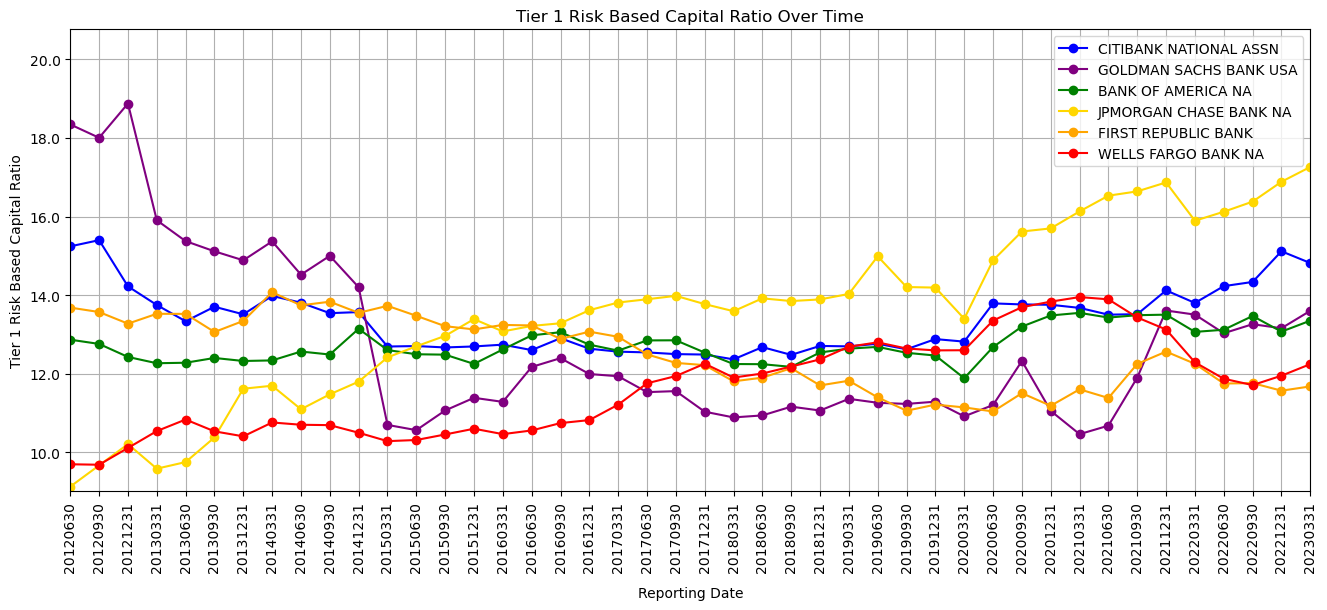

In [57]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Tier 1 Risk Based Capital Ratio"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Tier 1 Risk Based Capital Ratio Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Tier 1 Risk Based Capital Ratio")

# Set y-axis label format using the formatter function
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis_labels))

# Set y-axis limits
max_value = new_bank_perfor["Tier 1 Risk Based Capital Ratio"].max()
plt.ylim(9, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid(True)

# Add data source reference
plt.text(0.95, 0.05, "", ha='right', transform=plt.gca().transAxes)

plt.savefig("Outputs/Tier_1_Risk_Based_Capital.png",bbox_inches = "tight")

# Show the plot
plt.show()


# Tier 1 Risk Based Capital Ratio Analysis

1.The Tier 1 Risk Based Capital Ratio analysis reveals an interesting trend for JP Morgan Chase. At the beginning of the decade in 2012, JP Morgan Chase had the lowest ratio, almost reaching zero. However, over the course of the decade, JP Morgan Chase made significant progress and emerged as the frontrunner among the competitor banks, achieving a remarkable Tier 1 Risk Based Capital Ratio of 17.0. This signifies a strong capital position and suggests that JP Morgan Chase has effectively managed its risk and maintained a solid capital buffer.

2. First Republic Bank, on the other hand, displayed a more consistent performance throughout the decade. The bank consistently maintained a Tier 1 Risk Based Capital Ratio within the range of 11-14, indicating a relatively stable capital position and risk management strategy.

3. Goldman Sachs exhibited the highest level of fluctuation in the Tier 1 Risk Based Capital Ratio over the time period. The ratio varied considerably, indicating a higher degree of volatility and potentially reflecting the bank's exposure to various risk factors.

-These findings highlight the varying performances of banks in terms of their Tier 1 Risk Based Capital Ratio. JP Morgan Chase demonstrated remarkable progress, First Republic Bank showcased consistency, and Goldman Sachs exhibited higher fluctuations. The Tier 1 Risk Based Capital Ratio is an important metric that assesses a bank's capital adequacy and ability to absorb potential losses, providing insights into their risk management capabilities and financial stability.
